# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Muhammad Irfan Abidin
- Email: muhammadirfanabidin@gmail.com
- Id Dicoding: muhammadirfanabidin

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score

plt.style.use('ggplot')
sns.set(style="whitegrid", palette="Set2", font_scale=1.2)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


### Menyiapkan data yang akan diguankan

In [2]:
df = pd.read_csv('data/employee_data.csv')
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


## Data Understanding

In [3]:
df.shape

(1470, 35)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [5]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
EmployeeId,1470.0,NaN,NaN,NaN,735.5,424.496761,1.0,368.25,735.5,1102.75,1470.0
Age,1470.0,NaN,NaN,NaN,36.92381,9.135373,18.0,30.0,36.0,43.0,60.0
Attrition,1058.0,NaN,NaN,NaN,0.169187,0.375094,0.0,0.0,0.0,0.0,1.0
BusinessTravel,1470,3,Travel_Rarely,1043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DailyRate,1470.0,NaN,NaN,NaN,802.485714,403.5091,102.0,465.0,802.0,1157.0,1499.0
Department,1470,3,Research & Development,961,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistanceFromHome,1470.0,NaN,NaN,NaN,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
Education,1470.0,NaN,NaN,NaN,2.912925,1.024165,1.0,2.0,3.0,4.0,5.0
EducationField,1470,6,Life Sciences,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeCount,1470.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0


In [6]:
df.isnull().sum()[df.isnull().sum() > 0]

Attrition    412
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

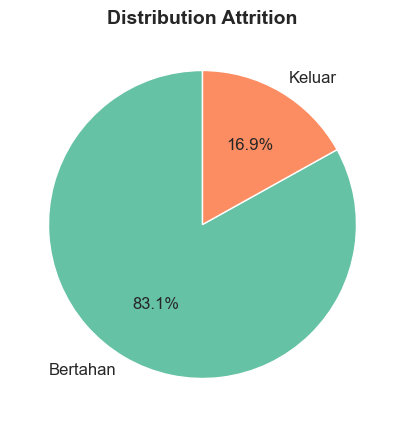

In [8]:
# Distribution Attrition
attrition_counts = df["Attrition"].value_counts()
labels = ["Bertahan", "Keluar"]

plt.figure(figsize=(5,5))
plt.pie(attrition_counts, labels=labels, autopct='%1.1f%%', 
        startangle=90, textprops={'fontsize': 12})
plt.title("Distribution Attrition", fontsize=14, fontweight="bold")
plt.show()


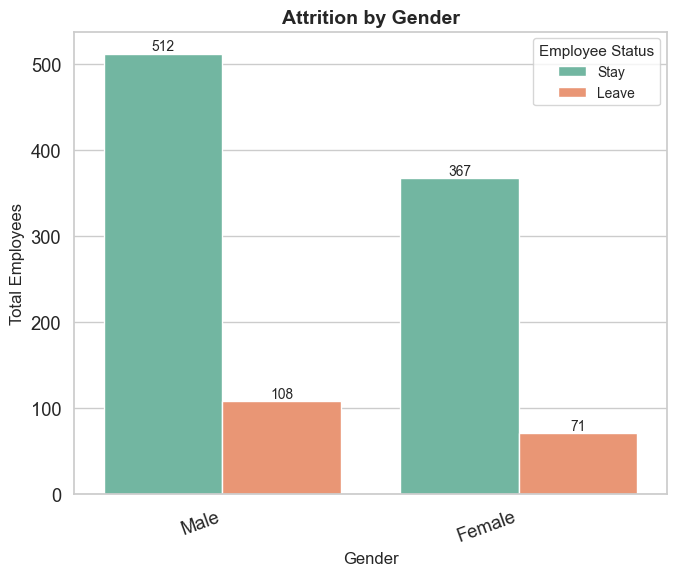

In [9]:
# Attrition by Gender
plt.figure(figsize=(7,6))
ax = sns.countplot(x="Gender", hue="Attrition", data=df)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

plt.title("Attrition by Gender", fontsize=14, fontweight="bold")
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Total Employees", fontsize=12)
plt.xticks(rotation=20, ha="right")

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ["Stay", "Leave"],
          title="Employee Status", fontsize=10, title_fontsize=11)

plt.tight_layout()
plt.show()


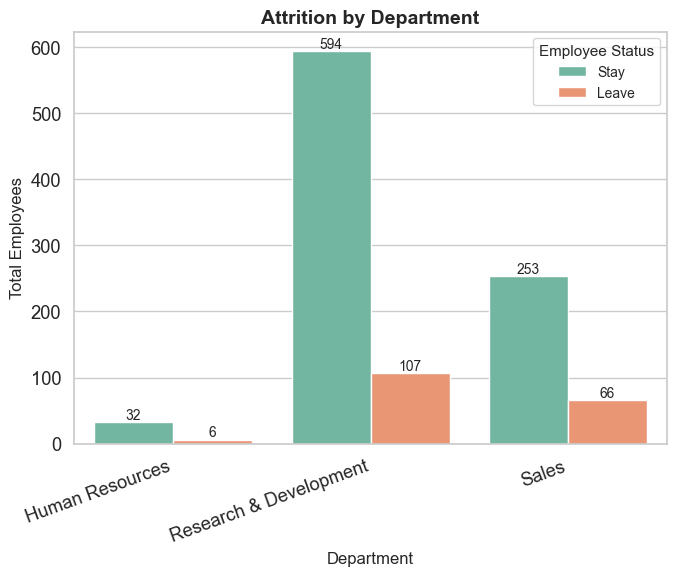

In [10]:
# Attrition by Department
plt.figure(figsize=(7,6))
ax = sns.countplot(x="Department", hue="Attrition", data=df)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

plt.title("Attrition by Department", fontsize=14, fontweight="bold")
plt.xlabel("Department", fontsize=12)
plt.ylabel("Total Employees", fontsize=12)
plt.xticks(rotation=20, ha="right")

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ["Stay", "Leave"], title="Employee Status",
          fontsize=10, title_fontsize=11)

plt.tight_layout()
plt.show()


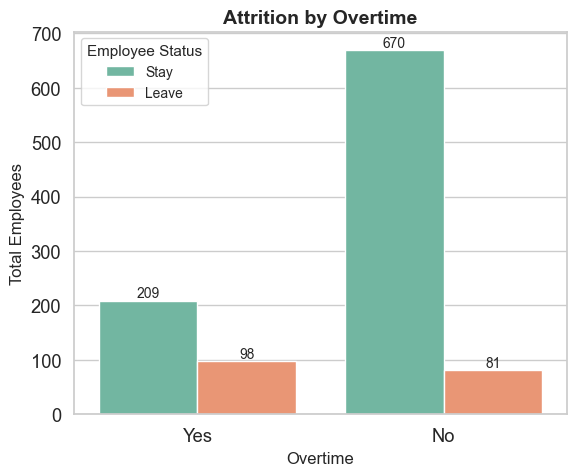

In [11]:
# Attrition by Overtime
plt.figure(figsize=(6,5))
ax = sns.countplot(x="OverTime", hue="Attrition", data=df)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

plt.title("Attrition by Overtime", fontsize=14, fontweight="bold")
plt.xlabel("Overtime", fontsize=12)
plt.ylabel("Total Employees", fontsize=12)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ["Stay", "Leave"], title="Employee Status",
          fontsize=10, title_fontsize=11)

plt.tight_layout()
plt.show()


### Data Understanding – Insight

Dataset ini berisi informasi mengenai **1.470 karyawan** dengan **35 kolom** yang mencakup data demografis, pekerjaan, dan kepuasan karyawan.  
Terdapat **412 nilai yang hilang (missing values)** pada kolom `Attrition`, sehingga hanya **1.058 data** yang dapat dianalisis untuk tingkat turnover karyawan.  

---


#### Insight Utama

1. **Overtime = Faktor Risiko Tertinggi**  
   - Karyawan dengan *overtime* memiliki tingkat attrition **31.9%**  
   - Dibandingkan dengan hanya **10.8%** untuk karyawan tanpa overtime  
   - Perbedaan ini **sangat signifikan** dan menjadi *red flag* utama  

---

2. **Departemen Sales Perlu Perhatian Khusus**  
   - Tingkat attrition tertinggi ada di **Sales (21.3%)**  
   - Meskipun bukan jumlah kasus terbanyak secara absolut  
   - Hal ini kemungkinan terkait dengan **tekanan target dan kompetisi**  

---

3. **Gender Gap yang Menarik**  
   - Karyawan pria memiliki tingkat attrition **sedikit lebih tinggi** dibandingkan wanita  
   - Perbedaannya **tidak drastis**, namun tetap perlu investigasi  
   - Bisa jadi ada faktor struktural yang mempengaruhi  

---

4. **Overall Health Check**  
   - Tingkat attrition keseluruhan berada di **16.9%**  
   - Masih dalam **rentang normal** untuk kebanyakan industri  
   - Namun ada area kritis (misalnya overtime & sales) yang **perlu intervensi**  


## Data Preparation / Preprocessing

### Cleaning Data

In [12]:
# Cleaning Data
df = df.dropna(subset=['Attrition'])
print(df['Attrition'].isnull().sum()) 

0


Menghapus **412 baris** dengan *missing values* pada kolom `Attrition`.

In [13]:
df.to_csv("data/employee_data_clean.csv", index=False)

### Feature Engineering

In [14]:
drop_cols = ["EmployeeId", "EmployeeCount", "Over18", "StandardHours"]
df = df.drop(columns=drop_cols)
df.shape

(1058, 31)

Menghapus kolom yang tidak relevan: `EmployeeId`, `EmployeeCount`, `Over18`, `StandardHours`.

In [15]:
df_encoded = df.copy()

# Label encoding untuk variabel binary
le = LabelEncoder()
df_encoded['Gender'] = le.fit_transform(df_encoded['Gender'])
df_encoded['OverTime'] = le.fit_transform(df_encoded['OverTime'])

# One-hot encoding untuk variabel multi-class
df_encoded = pd.get_dummies(df_encoded, columns=[
    'Department', 'BusinessTravel', 'EducationField',
    'JobRole', 'MaritalStatus'
], drop_first=True, dtype=int)

**Label Encoding** untuk variabel biner: `Gender`, `OverTime`.
**One-Hot Encoding** untuk variabel kategorikal multi-class.

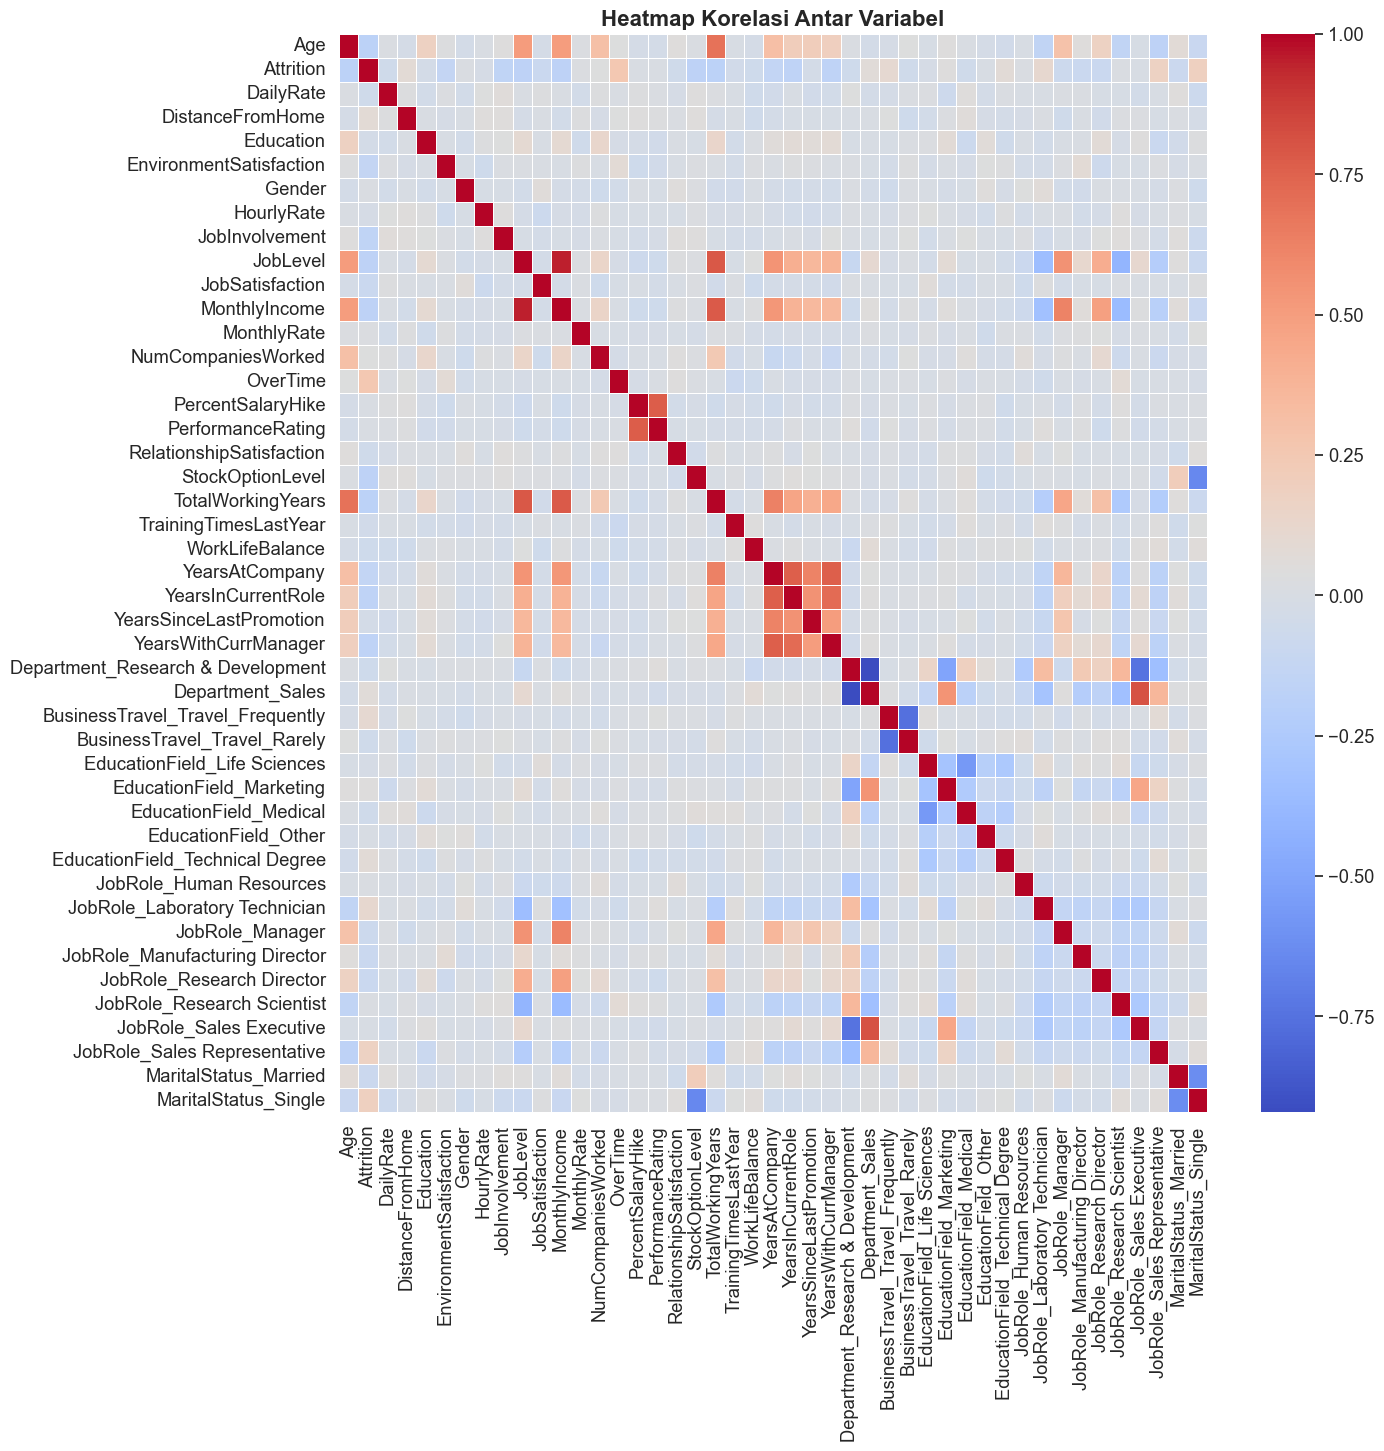

In [16]:
# Heatmap korelasi
plt.figure(figsize=(14,14))
sns.heatmap(df_encoded.corr(), cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Variabel", fontsize=16, fontweight="bold")
plt.show()

In [17]:
# Korelasi terhadap Attrition
corr_attrition = df_encoded.corr()["Attrition"].sort_values(ascending=False)
top5_corr = corr_attrition[1:11]
print(top5_corr)

OverTime                            0.255856
MaritalStatus_Single                0.184303
JobRole_Sales Representative        0.168200
JobRole_Laboratory Technician       0.113390
BusinessTravel_Travel_Frequently    0.104074
DistanceFromHome                    0.078074
EducationField_Technical Degree     0.076868
Department_Sales                    0.066083
EducationField_Marketing            0.042300
NumCompaniesWorked                  0.037429
Name: Attrition, dtype: float64


Profil Karyawan Berisiko Tinggi
- Bekerja **overtime**  
- Status **lajang/single**  
- Posisi **Sales Representative** atau **Laboratory Technician**  
- Sering melakukan **perjalanan dinas**  
- Tinggal **jauh dari kantor**  


In [18]:
X = df_encoded.drop("Attrition", axis=1)
y = df_encoded["Attrition"]

### Normalisasi

In [19]:
scaler = StandardScaler()
num_cols = X.select_dtypes(include=['int64','float64']).columns
X[num_cols] = scaler.fit_transform(X[num_cols])

Standardisasi fitur numerik menggunakan **StandardScaler**.

In [20]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1058.0,2.384146e-16,1.000473,-2.025922,-0.750137,-0.112244,0.631964,2.439326
DailyRate,1058.0,-2.350567e-17,1.000473,-1.732963,-0.843265,0.019490,0.879184,1.688667
DistanceFromHome,1058.0,4.365338e-17,1.000473,-0.992715,-0.868288,-0.246150,0.500415,2.491255
Education,1058.0,-2.006377e-16,1.000473,-1.822599,-0.852624,0.117350,1.087325,2.057300
EnvironmentSatisfaction,1058.0,3.441901e-17,1.000473,-1.567739,-0.652359,0.263020,1.178400,1.178400
Gender,1058.0,-2.350567e-17,1.000473,-1.189758,-1.189758,0.840507,0.840507,0.840507
HourlyRate,1058.0,-2.350567e-17,1.000473,-1.754527,-0.868494,-0.031684,0.854350,1.691159
JobInvolvement,1058.0,1.175283e-16,1.000473,-2.466281,-1.046626,0.373028,0.373028,1.792683
JobLevel,1058.0,1.846874e-17,1.000473,-0.960176,-0.960176,-0.079876,0.800424,2.561023
JobSatisfaction,1058.0,-1.863664e-16,1.000473,-1.585259,-0.679152,0.226955,1.133062,1.133062


### Splitting Data

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Jumlah data total:", len(df))
print("X_train:", X_train.shape)
print("X_test :", X_test.shape)
print("y_train:", y_train.shape)
print("y_test :", y_test.shape)

print("\nDistribusi target di train:")
print(y_train.value_counts(normalize=True))

print("\nDistribusi target di test:")
print(y_test.value_counts(normalize=True))

Jumlah data total: 1058
X_train: (846, 44)
X_test : (212, 44)
y_train: (846,)
y_test : (212,)

Distribusi target di train:
Attrition
0.0    0.830969
1.0    0.169031
Name: proportion, dtype: float64

Distribusi target di test:
Attrition
0.0    0.830189
1.0    0.169811
Name: proportion, dtype: float64


80% **training set** (846 sampel).
20% **test set** (212 sampel). 
Stratified sampling agar distribusi target tetap seimbang (83% bertahan, 17% keluar).

### Data Preparation – Insight

- **Total Data Bersih**: 1.058 karyawan  
- **Jumlah Features**: 44 (setelah encoding)  
- **Training Set**: 846 sampel  
- **Test Set**: 212 sampel  
- **Distribusi Target**: Seimbang antara train & test  

---

## Modeling

In [22]:
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(class_weight='balanced', probability=True, random_state=42)
}

## Evaluation

==================== Logistic Regression ====================
Akurasi Test Set : 0.7170
ROC AUC          : 0.8046
Precision        : 0.3421
Recall           : 0.7222
F1-Score         : 0.4643

Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.72      0.81       176
         1.0       0.34      0.72      0.46        36

    accuracy                           0.72       212
   macro avg       0.63      0.72      0.64       212
weighted avg       0.83      0.72      0.75       212



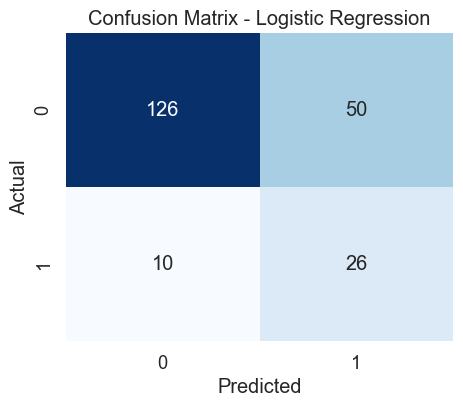




==================== Random Forest ====================
Akurasi Test Set : 0.8349
ROC AUC          : 0.7977
Precision        : 0.6000
Recall           : 0.0833
F1-Score         : 0.1463

Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.99      0.91       176
         1.0       0.60      0.08      0.15        36

    accuracy                           0.83       212
   macro avg       0.72      0.54      0.53       212
weighted avg       0.80      0.83      0.78       212



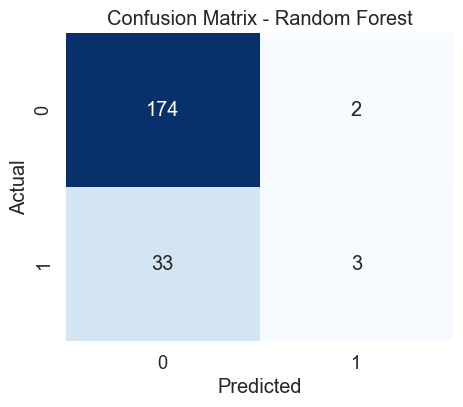




==================== Gradient Boosting ====================
Akurasi Test Set : 0.8585
ROC AUC          : 0.7914
Precision        : 0.6667
Recall           : 0.3333
F1-Score         : 0.4444

Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92       176
         1.0       0.67      0.33      0.44        36

    accuracy                           0.86       212
   macro avg       0.77      0.65      0.68       212
weighted avg       0.84      0.86      0.84       212



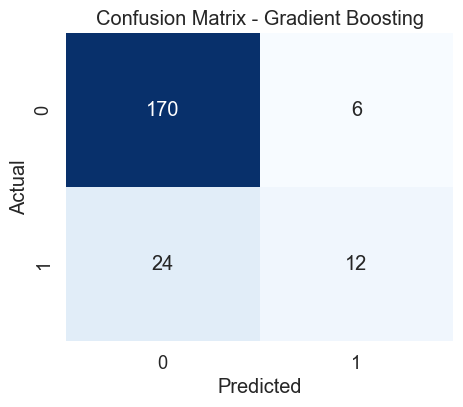




==================== KNN ====================
Akurasi Test Set : 0.8443
ROC AUC          : 0.7745
Precision        : 0.6364
Recall           : 0.1944
F1-Score         : 0.2979

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.91       176
         1.0       0.64      0.19      0.30        36

    accuracy                           0.84       212
   macro avg       0.75      0.59      0.61       212
weighted avg       0.82      0.84      0.81       212



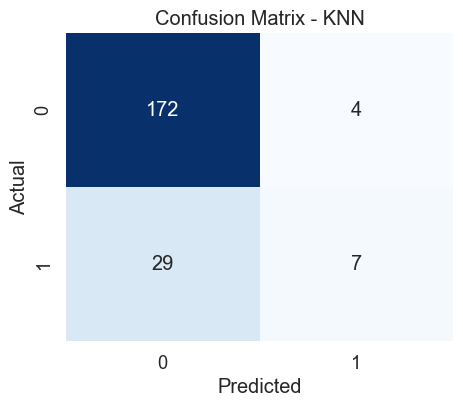




==================== SVM ====================
Akurasi Test Set : 0.8255
ROC AUC          : 0.8507
Precision        : 0.4902
Recall           : 0.6944
F1-Score         : 0.5747

Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.85      0.89       176
         1.0       0.49      0.69      0.57        36

    accuracy                           0.83       212
   macro avg       0.71      0.77      0.73       212
weighted avg       0.86      0.83      0.84       212



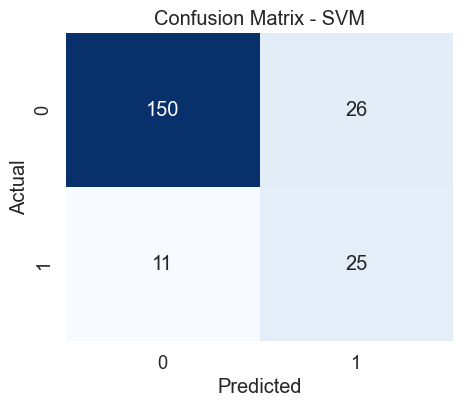

In [23]:
results = []

for name, model in models.items():
    print("="*20, name, "="*20)
    
    # Training
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Probabilitas untuk ROC AUC
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:,1]
    else:
        y_prob = model.decision_function(X_test)
    
    # Evaluasi
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results.append({
        "Model": name, 
        "Accuracy": acc, 
        "ROC AUC": auc,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    })
    
    print(f"Akurasi Test Set : {acc:.4f}")
    print(f"ROC AUC          : {auc:.4f}")
    print(f"Precision        : {precision:.4f}")
    print(f"Recall           : {recall:.4f}")
    print(f"F1-Score         : {f1:.4f}\n")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    print("\n\n")

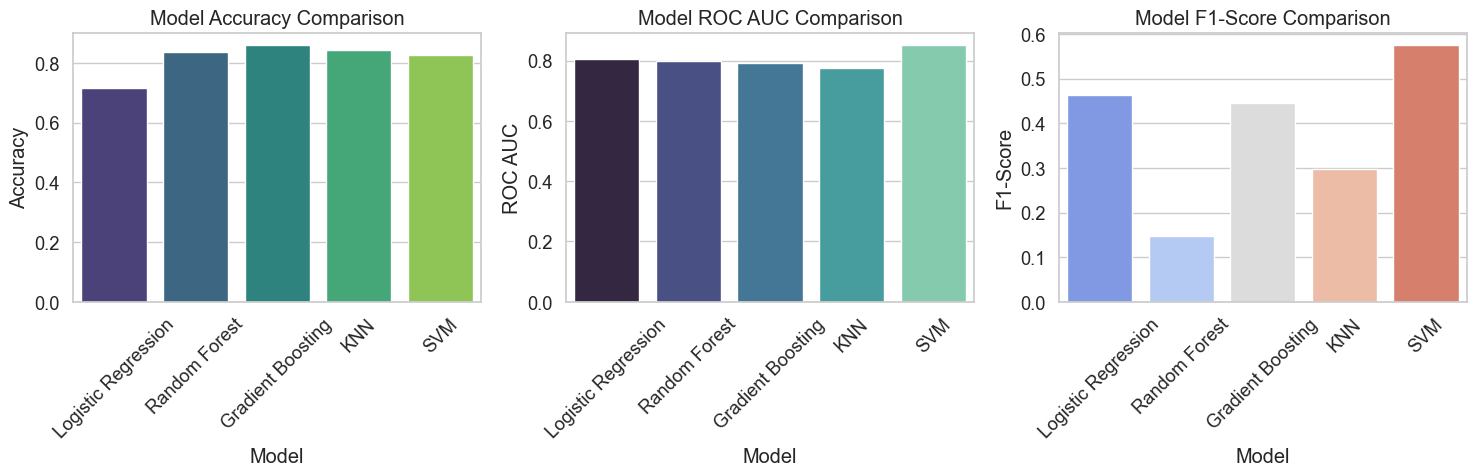

In [24]:
df_results = pd.DataFrame(results)

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.barplot(x="Model", y="Accuracy", data=df_results, palette="viridis")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45)

plt.subplot(1,3,2)
sns.barplot(x="Model", y="ROC AUC", data=df_results, palette="mako")
plt.title("Model ROC AUC Comparison")
plt.xticks(rotation=45)

plt.subplot(1,3,3)
sns.barplot(x="Model", y="F1-Score", data=df_results, palette="coolwarm")
plt.title("Model F1-Score Comparison")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Model Evaluation – Insight  

Setelah dilakukan training dan evaluasi menggunakan **5 algoritma Machine Learning**, didapatkan hasil sebagai berikut:  

### 🔹 Hasil Utama per Model
| Model                | Accuracy | ROC AUC | Precision | Recall | F1-Score |
|-----------------------|----------|---------|-----------|--------|-----------|
| Logistic Regression   | 0.7170   | 0.8046  | 0.3421    | **0.7222** | 0.4643 |
| Random Forest         | 0.8349   | 0.7977  | 0.6000    | 0.0833 | 0.1463 |
| Gradient Boosting     | **0.8585** | 0.7914  | **0.6667** | 0.3333 | 0.4444 |
| KNN                   | 0.8443   | 0.7745  | 0.6364    | 0.1944 | 0.2979 |
| SVM                   | 0.8255   | **0.8507**  | 0.4902    | 0.6944 | **0.5747** |

---

#### 🔹 Insight Performa Model
1. **Logistic Regression**
   - Recall tertinggi (**72.2%**) → paling baik dalam mendeteksi karyawan yang berisiko resign.  
   - Namun precision rendah (34.2%) → cukup banyak *false positive*.  

2. **Random Forest**
   - Accuracy tinggi (83.5%) tapi recall sangat rendah (**8.3%**) → hampir gagal mendeteksi karyawan yang keluar.  
   - Overfitting terhadap kelas mayoritas (tetap bekerja).  

3. **Gradient Boosting**
   - Akurasi tertinggi (**85.9%**) dengan precision juga cukup baik (**66.7%**).  
   - Recall masih rendah (33.3%), artinya model lebih hati-hati (*conservative*) dalam memprediksi attrition.  

4. **KNN**
   - Performa menengah, tidak terlalu baik dalam precision maupun recall.  
   - Masih kalah dibanding model lain.  

5. **SVM**
   - ROC AUC tertinggi (**0.85**) dan F1-Score terbaik (**0.5747**).  
   - Seimbang antara precision (49%) dan recall (69%).  
   - **Pilihan terbaik** jika tujuan adalah *balanced performance*.  

---

#### 🔹 Visualisasi Perbandingan
Tiga metrik utama divisualisasikan:  

- **Accuracy**: Gradient Boosting unggul.  
- **ROC AUC**: SVM paling baik.  
- **F1-Score**: SVM unggul → paling seimbang mendeteksi attrition dengan kesalahan minimal.  

 Dari hasil ini, **SVM** bisa dipilih sebagai model utama, sedangkan **Logistic Regression** tetap relevan jika fokus utama adalah **menangkap sebanyak mungkin karyawan yang berisiko resign** (high recall).  


In [26]:
# Save Model
os.makedirs("model", exist_ok=True)
best_model = models["SVM"]

joblib.dump(best_model, "model/best_model.pkl")
joblib.dump(scaler, "model/scaler.pkl")
joblib.dump(X.columns.tolist(), "model/feature_columns.pkl")

['model/feature_columns.pkl']

## Conclusion  

Berdasarkan hasil analisis data dan evaluasi model prediksi **attrition karyawan**, diperoleh beberapa temuan penting yang dapat menjadi dasar bagi departemen HR dalam mengambil keputusan strategis:  

1. **Overtime sebagai faktor risiko utama**  
   - Karyawan yang sering melakukan lembur memiliki kemungkinan **3 kali lebih tinggi** untuk resign dibandingkan yang tidak lembur.  
   - Hal ini menunjukkan pentingnya **manajemen beban kerja** agar tidak menimbulkan kelelahan dan burnout.  

2. **Departemen Sales perlu perhatian khusus**  
   - Tingkat attrition tertinggi berada pada departemen **Sales (21.3%)**, kemungkinan besar akibat **target yang tinggi dan kompetisi ketat**.  
   - HR perlu merancang program **insentif, dukungan mental, dan pelatihan** untuk menurunkan tingkat turnover.  

3. **Perbedaan Gender**  
   - Karyawan pria memiliki tingkat attrition **sedikit lebih tinggi** dibanding wanita, meskipun tidak signifikan.  
   - Namun, tetap perlu ditelusuri apakah ada faktor **struktural atau budaya kerja** yang memengaruhi.  

4. **Performa Model Prediksi**  
   - Model **SVM (Support Vector Machine)** menunjukkan performa terbaik secara seimbang (F1-Score 0.5747, ROC AUC 0.8507).  
   - Model ini dapat digunakan sebagai **alat prediksi HR** untuk mengidentifikasi karyawan berisiko tinggi.  
   - Alternatifnya, **Logistic Regression** dapat dipakai jika HR lebih fokus pada **recall tinggi** (menangkap lebih banyak kasus resign).  

---

## Rekomendasi HR  

- **Kurangi beban lembur** → atur *workload management* dan pertimbangkan sistem *shift* yang lebih sehat.  
- **Program retensi khusus untuk Sales** → berikan *reward system*, *career path* yang jelas, dan dukungan untuk mengurangi stres.  
- **Gunakan model prediksi SVM** untuk memantau karyawan berisiko resign, sehingga HR dapat melakukan **intervensi lebih dini**.  
- **Lakukan survei kepuasan kerja secara berkala** untuk mendalami faktor lain yang mungkin belum terekam dalam dataset.  

---

Dengan intervensi yang tepat berdasarkan insight ini, departemen HR dapat **menurunkan tingkat attrition secara signifikan** dan sekaligus **meningkatkan kepuasan serta retensi karyawan**.  
